In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
fn_src ='https://drive.google.com/uc?export=download&id=1RzQpKONOcXSMxH2ZzOI4iVMiTgD6ttSl'
fn_dst ='eeg_dat.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    print('Fetching file %s [53MB].  This may take a minute..' % fn_dst)
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File eeg_dat.p is already downloaded


In [3]:
import pickle
fn = 'eeg_dat.p'
with open(fn, 'rb') as fp:
    [X,Y] = pickle.load(fp)

In [4]:
# TODO 1
nt = Y.shape[1]
ncur = X.shape[1]
nchan = Y.shape[0]
nvoxels = ncur / 3
print("nt:{},ncur:{},nchan:{},nvoxels:{}".format(nt,ncur,nchan,nvoxels))

nt:85,ncur:22494,nchan:305,nvoxels:7498.0


In [5]:
# TODO 2
Xtr1,Xts1,Ytr1,Yts1 = train_test_split(X,Y,test_size=0.33) 

In [6]:
# TODO 3

from sklearn.preprocessing import StandardScaler

xscal = StandardScaler()
yscal = StandardScaler()
Xtr = xscal.fit_transform(Xtr1)
Xts = xscal.transform(Xts1)
Ytr = yscal.fit_transform(Ytr1)
Yts = yscal.transform(Yts1)

regr = Ridge(alpha=1)

In [7]:
# TODO 4
regr.fit(Xtr, Ytr)
yhat = regr.predict(Xtr)
yhat_ts = regr.predict(Xts)
rsq_tr = r2_score(yhat, Ytr)
rsq_ts = r2_score(Yts, yhat_ts)
print("rsq_tr:{},rsq_ts:{}".format(rsq_tr,rsq_ts))

rsq_tr:0.9913835239933481,rsq_ts:-3.0417168130447303


In [8]:
# TODO 5
alphas = np.logspace(0.01,100,20)
nalpha = len(alphas)
rsq = np.zeros(nalpha)
for i, a in enumerate(alphas):
  # Fit on the training data
  reg = Ridge(alpha=a)
  reg.fit(Xtr, Ytr)

  # Score on the test data
  yhat = reg.predict(Xts)
  rsq[i] = r2_score(Yts, yhat)

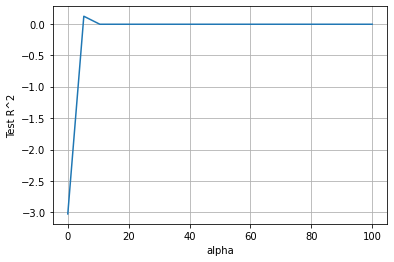

Maximum test R^2:0.11917333137807114


In [9]:
# TODO 6
xp = np.linspace(0.01,100,20)
plt.plot(xp,rsq)
plt.xlabel('alpha')
plt.ylabel('Test R^2')
plt.grid()
plt.show()
print("Maximum test R^2:{}".format(np.max(rsq)))

In [10]:
from math import sqrt
# TODO 7
rsq_ridge_mean = np.mean(rsq)
im = np.argmax(rsq_ridge_mean)
alpha_op = alphas[im]
print("Optimal alpha is {}".format(alpha_op))

reg_op = Ridge(alpha=alpha_op)
reg_op.fit(Xtr,Ytr)
yhat_op = reg_op.predict(Xts)
W = reg_op.coef_
W = np.transpose(W)
Wrms = np.zeros(W.shape[0])
for j in range(W.shape[0]):
  for k in range(W.shape[1]):
    Wrms[j] += (W[j,k]**2)
  Wrms[j] = sqrt(Wrms[j])
print(Wrms)

Optimal alpha is 1.023292992280754
[0.28563329 0.45895426 0.40475999 ... 0.06258695 0.02785448 0.07471179]


In [ ]:
# TODO 8
regr_la = Lasso(alpha=1e-3,max_iter=100,tol=0.01)
regr_la.fit(Xtr, Ytr)

In [12]:
# TODO 9
yhat_la = regr_la.predict(Xts)
rsq_la = r2_score(Yts,yhat_la)
print("Lasso rsq:{}".format(rsq_la))

Lasso rsq:-1.1433842366269564


In [13]:
# TODO 10
alphas_la = np.logspace(0.0001,0.001,5)
na = len(alphas_la)
rsq_la = np.zeros(na)
W_collect = np.zeros((na,W.shape[0],W.shape[1]))
for i, a in enumerate(alphas_la):
  # Fit on the training data
  reg_la = Lasso(alpha=a)
  reg_la.fit(Xtr, Ytr)

  # Score on the test data
  yhat_la_cross = reg_la.predict(Xts)
  rsq_la[i] = r2_score(Yts, yhat_la_cross)

  W_i = reg_la.coef_
  W_i = np.transpose(W_i)
  W_collect[i] = W_i

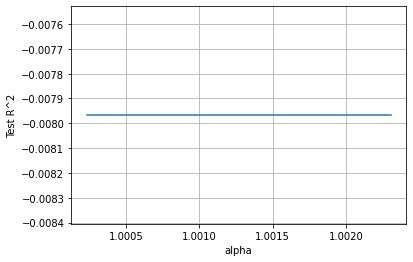

Lasso maximum test R^2:-0.007966872662701673


In [14]:
# TODO 11
plt.plot(alphas_la,rsq_la)
plt.xlabel('alpha')
plt.ylabel('Test R^2')
plt.grid()
plt.show()
print("Lasso maximum test R^2:{}".format(np.max(rsq_la)))

In [15]:
# TODO 12
rsq_lasso_mean = np.mean(rsq_la)
imax = np.argmax(rsq_lasso_mean)

Wrms_la = np.zeros(W_collect[imax].shape[0])
for j in range(W_collect[imax].shape[0]):
  for k in range(W_collect[imax].shape[1]):
    Wrms_la[j] += (W_collect[imax,j,k]**2)
  Wrms_la[j] = sqrt(Wrms_la[j])
print(Wrms_la)

[0. 0. 0. ... 0. 0. 0.]
